# Equation Solving

## Importing Modules

In [1]:
from scipy import linalg as la
from scipy import optimize
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

## Linear Equation Systems

> ### Rectangular Systems

### Underdetermined System (can only be symbolically solved by SymPy)

In [2]:
x_vars = sp.symbols("x_1, x_2, x_3")
x = sp.Matrix(x_vars)
x

Matrix([
[x_1],
[x_2],
[x_3]])

In [3]:
A = sp.Matrix([[2, 3, 1], [5, 4, 0]])
b = sp.Matrix([4, 3])

In [4]:
A.rank()

2

In [5]:
A.condition_number() 

zoo

In [6]:
A.norm()

sqrt(55)

In [7]:
sp.solve(A*x - b, x_vars)

{x_1: 4*x_3/7 - 1, x_2: 2 - 5*x_3/7}

### Overdetermined Systems (fitting, can not be solved parametrically by SymPy)

In [8]:
x = np.linspace(-1, 1, 100)
a, b, c = 1, 2, 3
y_exact = a + b * x + c * x**2

In [9]:
#noisy data
m = 100
X = np.random.rand(m) - np.sin(np.random.rand(m))
Y = a + b * X + c * X**2 + 2 * np.random.rand(m)

In [10]:
#fit
A = np.vstack([X**0, X**1, X**2])
sol, res, rank, sv = la.lstsq(A.T, Y)
print(sol, res, rank, sv, sep="\n")

[1.96771917 1.95250962 3.34364872]
35.78605241932791
3
[10.24302957  4.21077154  1.74268422]


In [11]:
y_fit = sol[0] + sol[1] * x + sol[2] * x**2

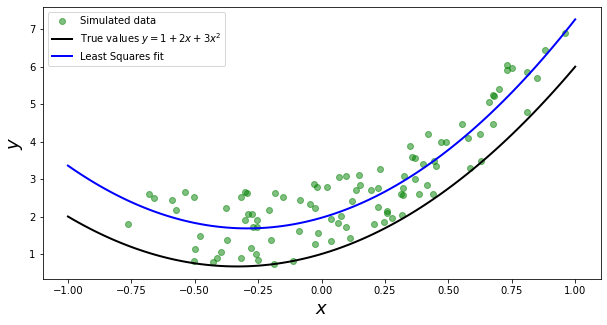

In [12]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(X, Y, 'go', alpha=0.5, label='Simulated data')
ax.plot(x, y_exact, 'k', lw=2, label='True values $y = 1 + 2x + 3x^2$')
ax.plot(x, y_fit, 'b', lw=2, label='Least Squares fit')
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
ax.legend(loc=2)

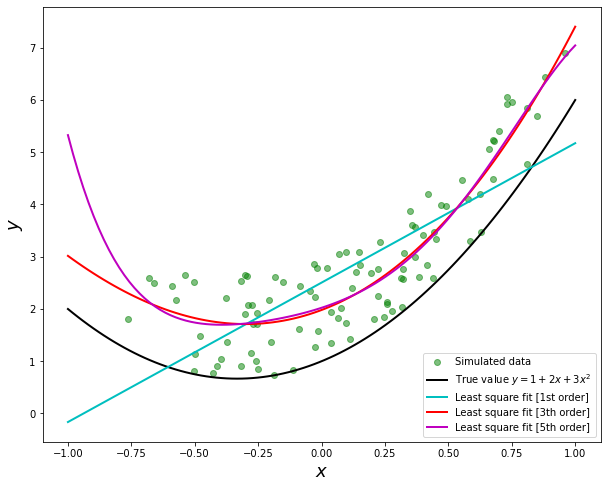

In [13]:
#1st order
A = np.vstack([X**n for n in range(2)])
sol, res1, rank, sv = la.lstsq(A.T, Y)
y_fit1 = sum([s * x**n for n, s in enumerate(sol)])

#3th order
A = np.vstack([X**n for n in range(4)])
sol, res3, rank, sv = la.lstsq(A.T, Y)
y_fit3 = sum([s * x**n for n, s in enumerate(sol)])

#5th order
A = np.vstack([X**n for n in range(6)])
sol, res5, rank, sv = la.lstsq(A.T, Y)
y_fit5 = sum([s * x**n for n, s in enumerate(sol)])

fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(X, Y, 'go', alpha=0.5, label='Simulated data')
ax.plot(x, y_exact, 'k', lw=2, label='True value $y = 1 + 2x + 3x^2$')
ax.plot(x, y_fit1, 'c', lw=2, label='Least square fit [1st order]')
ax.plot(x, y_fit3, 'r', lw=2, label='Least square fit [3th order]')
ax.plot(x, y_fit5, 'm', lw=2, label='Least square fit [5th order]')
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
ax.legend(loc=4)

### Comparing Several Linear and Nonlinear Models

In [98]:
from sklearn.linear_model import BayesianRidge
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor
import pandas as pd
df = pd.DataFrame(X)
df

,0
0,-0.291594
1,0.623005
2,0.369432
3,-0.083998
4,0.222178
...,...
95,0.322564
96,0.118121
97,-0.300856
98,-0.317056


In [115]:
brg = BayesianRidge()
svr = SVR()
ext = ExtraTreesRegressor()
brg.fit(df, Y)
svr.fit(df, Y)
ext.fit(df, Y)
brg.score(df, Y), svr.score(df, Y), ext.score(df, Y)

(0.6283800736976417, 0.8106063431817423, 1.0)

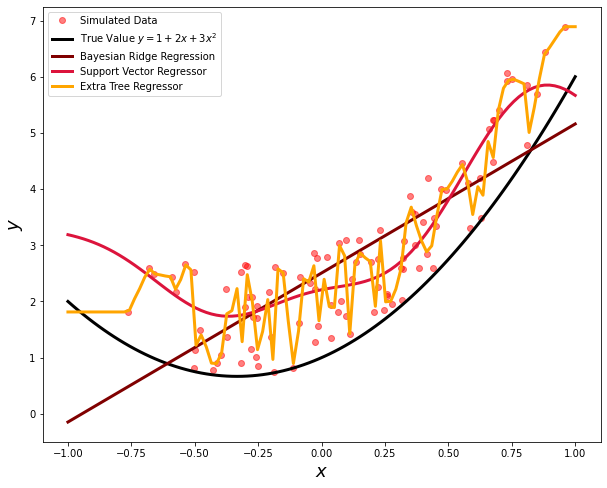

In [116]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(X, Y, 'ro', alpha=0.5, label='Simulated Data')
ax.plot(x, y_exact, 'k', lw=3, label='True Value $y = 1 + 2x + 3x^2$')
ax.plot(x, brg.predict(pd.DataFrame(x)), 'maroon', lw=3, label='Bayesian Ridge Regression')
ax.plot(x, svr.predict(pd.DataFrame(x)), 'crimson', lw=3, label='Support Vector Regressor')
ax.plot(x, ext.predict(pd.DataFrame(x)), 'orange', lw=3, label='Extra Tree Regressor')
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
ax.legend(loc=2)